<a href="https://colab.research.google.com/github/Ihsan1331/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Package

---



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

#2. Import Dataset

---



In [77]:
import warnings
warnings.filterwarnings('ignore')
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1pqMhdhBuOcvt-H3EtTRbQU2zDgFJn_Dt"}) 
downloaded.GetContentFile('digit-recognizer.zip')        

In [78]:
!unzip digit-recognizer.zip -d digit-recognizer

Archive:  digit-recognizer.zip
replace digit-recognizer/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: digit-recognizer/sample_submission.csv  
  inflating: digit-recognizer/test.csv  
  inflating: digit-recognizer/train.csv  


In [79]:
train_data = pd.read_csv('./digit-recognizer/train.csv')
test_data = pd.read_csv('./digit-recognizer/test.csv')

# 3. Preprocessing

---



## 3.1 Extract Label feature from train data

In [80]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [81]:
train_label = train_data['label']
train_data = train_data.drop(['label'], axis = 1)
print('shape of train data = ', train_data.shape)
print('shape of test data = ', test_data.shape)

shape of train data =  (42000, 784)
shape of test data =  (28000, 784)


## 3.2 Reshape the image from 1D to 3D matrices 

In [82]:
train_data_np = train_data.values.reshape(-1, 28, 28, 1 )
test_data_np = test_data.values.reshape(-1,28,28,1)

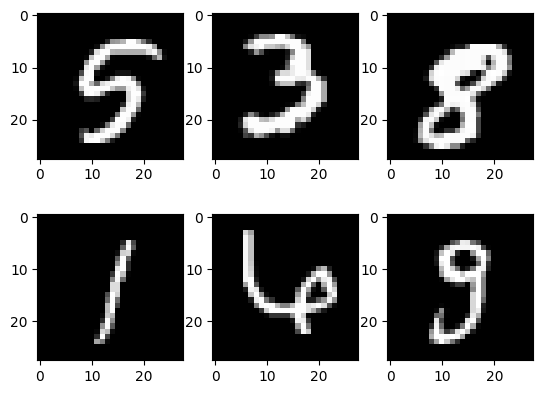

In [83]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
ax1.imshow(train_data_np[8], cmap ='gray')
ax2.imshow(train_data_np[9], cmap ='gray')
ax3.imshow(train_data_np[10], cmap ='gray')
ax4.imshow(train_data_np[15], cmap ='gray')
ax5.imshow(train_data_np[89], cmap ='gray')
ax6.imshow(train_data_np[40], cmap ='gray')

## 3.3 Normalize the pixel value

In [84]:
train_data_norm = train_data_np/255
test_data_norm = test_data_np/255

##3.4 Split train data into train and validation data

In [85]:
x_train, x_test, y_train, y_test = train_test_split(train_data_norm, train_label, test_size = 0.2, stratify = train_label) 

## 3.5 One Hot Encoder

In [86]:
depth = 10
y_train = tf.one_hot(y_train, depth)
y_test = tf.one_hot(y_test, depth)

#4. CNN Model

---



## 4.1 CNN architecture

In [87]:
i = Input(shape = (28, 28,1))

conv1 = Conv2D(32, (2,2), activation = 'relu', padding = 'same')(i)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(16, (2,2), activation = 'relu', padding = 'same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

drop1 = Dropout(0.2)(pool2)

conv3 = Conv2D(8, (2,2), activation = 'relu', padding = 'same')(drop1)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

drop2 = Dropout(0.2)(pool3)

conv4 = Conv2D(4, (2,2), activation = 'relu', padding = 'same')(drop2)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)

flatten = Flatten()(pool4)
dense = Dense(10, activation = 'softmax')(flatten)

model = Model(i,dense)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 16)          0   

## 4.2 Training CNN

In [88]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size = 32)

Epoch 1/50
1050/1050 [==============================] - 7s 5ms/step - loss: 0.6554 - accuracy: 0.7753 - val_loss: 0.2279 - val_accuracy: 0.9277
Epoch 2/50
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2363 - accuracy: 0.9250 - val_loss: 0.1429 - val_accuracy: 0.9563
Epoch 3/50
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1845 - accuracy: 0.9404 - val_loss: 0.1288 - val_accuracy: 0.9610
Epoch 4/50
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1572 - accuracy: 0.9498 - val_loss: 0.1007 - val_accuracy: 0.9701
Epoch 5/50
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1423 - accuracy: 0.9544 - val_loss: 0.0907 - val_accuracy: 0.9715
Epoch 6/50
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1264 - accuracy: 0.9588 - val_loss: 0.0864 - val_accuracy: 0.9740
Epoch 7/50
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1170 - accuracy: 0.9622 - val_loss: 0.0802 - val_accuracy:

## 4.4 Evaluate the Model

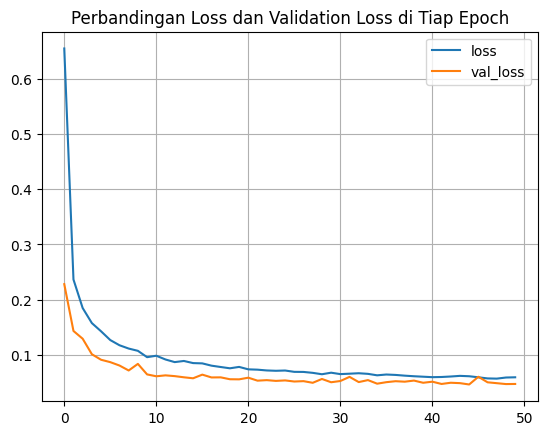

In [89]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Perbandingan Loss dan Validation Loss di Tiap Epoch')
plt.legend()
plt.grid()
plt.show()

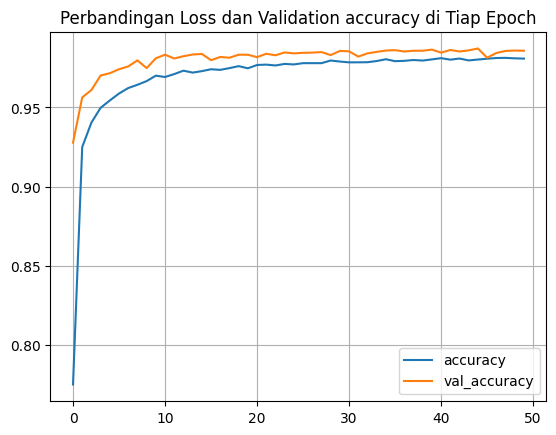

In [90]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('Perbandingan Loss dan Validation accuracy di Tiap Epoch')
plt.legend()
plt.grid()
plt.show()

In [91]:
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis = 1)
y_test = np.argmax(y_test, axis = 1)

263/263 [==============================] - 1s 2ms/step


In [92]:
confusion_matrix(y_test,y_predict)

array([[818,   0,   1,   0,   1,   0,   3,   0,   2,   2],
       [  3, 928,   4,   0,   0,   0,   0,   2,   0,   0],
       [  1,   0, 823,   0,   1,   0,   0,   4,   4,   2],
       [  1,   0,   3, 851,   0,   8,   1,   3,   2,   1],
       [  0,   2,   1,   0, 805,   0,   0,   2,   1,   3],
       [  0,   1,   0,   0,   0, 756,   1,   0,   1,   0],
       [  3,   1,   0,   0,   1,   2, 819,   0,   1,   0],
       [  0,   1,   5,   0,   3,   1,   0, 861,   0,   9],
       [  0,   0,   4,   0,   1,   5,   2,   2, 795,   4],
       [  2,   0,   0,   0,   6,   2,   0,   2,   2, 824]])

In [93]:
print('accuracy = ', accuracy_score(y_test, y_predict))

accuracy =  0.9857142857142858


# 5. Prediction on test data

In [94]:
y_predict_test = model.predict(test_data_norm)
y_predict_test = np.argmax(y_predict_test, axis = 1)
pd_y_test = pd.DataFrame(y_predict_test, columns = ['Label'])
ID = pd.DataFrame(range(1, len (y_predict_test)+1), columns = ['ImageId'])

875/875 [==============================] - 2s 2ms/step


In [95]:
pd.concat([ID, pd_y_test], axis = 1).to_csv('MNIST.csv', index = False)